In [260]:
import pandas as pd
df = pd.read_csv("/Users/sujithrathod/D_learning/Basic/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [261]:
df.shape

(10000, 14)

In [262]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [263]:
df.duplicated().sum()

0

In [264]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [265]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [266]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [267]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [268]:
df = pd.get_dummies(df, columns=["Geography"],drop_first=True)

In [269]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [270]:
x = df.drop(columns=["Exited"])
y = df["Exited"]

In [271]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled

array([[-1.05008411,  0.90179633,  0.75175306, ..., -0.04925965,
        -0.56118125, -0.57812007],
       [ 0.29631699,  0.90179633, -0.47907689, ..., -0.58254072,
        -0.56118125, -0.57812007],
       [-1.24686581, -1.10889783,  0.27835693, ..., -0.16313933,
        -0.56118125, -0.57812007],
       ...,
       [-0.87401628,  0.90179633, -0.47907689, ...,  1.07759708,
        -0.56118125,  1.72974448],
       [-0.31474197, -1.10889783, -0.85779379, ...,  1.14197101,
         1.78195548, -0.57812007],
       [ 0.0373937 ,  0.90179633,  1.22514919, ..., -0.88821212,
         1.78195548, -0.57812007]])

In [273]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



In [274]:
model = Sequential()
model.add(Dense(11,activation="relu",input_dim = 11)) #hidden layer 
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [275]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [276]:
# model compilation
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [277]:
history = model.fit(x_train_scaled,y_train, epochs= 40,validation_split=0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.3454 - loss: 0.9196 - val_accuracy: 0.7906 - val_loss: 0.5329
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7866 - loss: 0.5113 - val_accuracy: 0.7981 - val_loss: 0.4712
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7987 - loss: 0.4587 - val_accuracy: 0.8025 - val_loss: 0.4470
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8020 - loss: 0.4466 - val_accuracy: 0.8056 - val_loss: 0.4317
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8146 - loss: 0.4274 - val_accuracy: 0.8125 - val_loss: 0.4215
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8285 - loss: 0.4102 - val_accuracy: 0.8150 - val_loss: 0.4133
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8334 - loss: 0.4071 - val_accuracy: 0.8206 - val_loss: 0.4047
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8367 - loss: 0.4073 - 

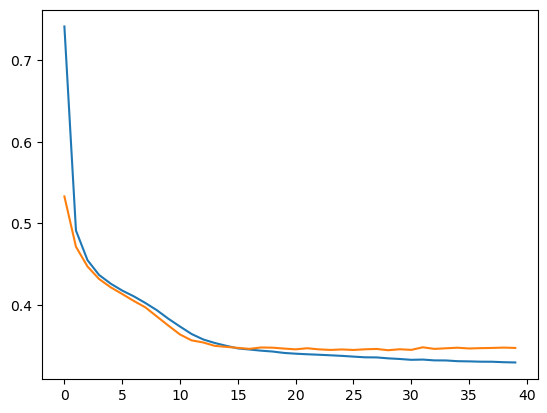

In [285]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
model.layers[0].get_weights()  #first layer

[array([[ 0.06740542, -0.14232655,  0.11739596,  0.20691225,  0.30887625,
          0.1782098 , -0.24940336,  0.10567569, -0.42570978,  0.34431908,
          0.08547481],
        [ 0.26966858,  0.0261169 , -0.11627962, -0.32196808,  0.20332111,
          0.4092053 ,  0.3800839 , -0.16112499, -0.23153532,  0.05541159,
         -0.13858122],
        [ 0.09241111,  1.1525033 ,  0.02430556,  0.0174995 , -0.2322028 ,
         -0.16644323,  0.32776964, -0.48563555,  0.03432316, -0.47772744,
          0.75495756],
        [-0.09969267, -0.01860634, -0.11819939, -0.01918296, -0.3951107 ,
          0.36060667,  0.10361368, -0.4990442 , -0.25636646,  0.24533162,
         -0.03799097],
        [ 0.3858501 , -0.07102969, -0.29417926,  0.40352744, -0.28163055,
         -0.3104091 , -0.06766756,  0.22976585,  0.18247679,  0.12069377,
          0.04673659],
        [ 1.0157076 , -0.16631183, -0.99128175,  0.9825655 ,  0.18328246,
          0.08953885,  0.7957609 , -0.3007365 , -0.21866488, -0.0023427

In [ ]:
model.layers[1].get_weights() #second layer

[array([[ 0.3202625 , -0.12751019,  0.75939864, -0.38426504,  0.22148432,
          0.2733652 , -0.32492244,  0.22502172,  0.3714421 , -0.14509372,
          0.17480169],
        [-0.6422097 ,  0.2826447 ,  0.24227133,  0.3647054 , -0.6549742 ,
          0.38884327, -0.29759544, -0.69609344,  0.27799326,  0.55991286,
          0.47985592],
        [ 0.11536827,  0.1123718 ,  0.07694885, -0.6040305 ,  0.31488666,
          0.7208507 , -0.45513642,  0.12017264,  0.1924818 , -0.44590363,
          0.5983405 ],
        [ 0.4148394 , -0.7916644 ,  0.5506211 ,  0.03034752, -0.56141555,
          0.45050186, -0.24297075,  0.02179931, -0.48754513, -0.7231525 ,
          0.36283287],
        [-0.14482898,  0.06456372, -0.00934569, -0.15164292,  0.40895292,
          0.09528548,  0.603874  ,  0.2533332 ,  0.48589984,  0.12570548,
          0.33710065],
        [-0.00720108,  0.21235421, -0.30151477,  0.5308317 ,  0.46583527,
         -0.0858388 ,  0.0633736 ,  0.2833968 , -0.35340157, -0.4094897

In [ ]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


In [ ]:
import numpy as np
y_pred = np.where(y_log > 0.5,1,0) 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86